# Basic PyePAL usage

In this example we illustrate how to run one active learning iteration with the PyePAL package.

In [15]:
from pyepal import PALCoregionalized
from pyepal.models.gpr import build_coregionalized_model
from pyepal.pal.utils import exhaust_loop
import numpy as np
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

We will use the [Binh-Korn test function](https://en.wikipedia.org/wiki/Test_functions_for_optimization), which defines our Pareto front.

In [7]:
def binh_korn(x, y):  # pylint:disable=invalid-name
    """https://en.wikipedia.org/wiki/Test_functions_for_optimization"""
    obj1 = 4 * x ** 2 + 4 * y ** 2
    obj2 = (x - 5) ** 2 + (y - 5) ** 2
    return -obj1, -obj2

In [8]:
def binh_korn_points():
    """Create a dataset based on the Binh-Korn test function"""
    x = np.linspace(0, 5, 100)  # pylint:disable=invalid-name
    y = np.linspace(0, 3, 100)  # pylint:disable=invalid-name
    array = np.array([binh_korn(xi, yi) for xi, yi in zip(x, y)])
    return np.hstack([x.reshape(-1, 1), y.reshape(-1, 1)]), array

In [9]:
x, points = binh_korn_points()

Text(0, 0.5, 'objective 2')

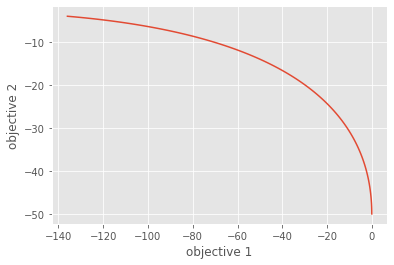

In [23]:
plt.plot(points[:,0], points[:,1])
plt.xlabel('objective 1')
plt.ylabel('objective 2')

We will build a coregionalized Gaussian Process Regression model, using the `build_coregionalized_model` helper function. 
By default, this uses a Matérn-5/2 kernel with automatic relevance determinatation and ICM for the coregionalization.

In [14]:
model = build_coregionalized_model(x, points)

With this model, we can initialize our PAL instance, `PALCoregionalized` will use a logarithmically ($\lg_2$) spaced grid for hyperparameter optimization. Said in other words, the parameters of the GPR model will be optimized on the 0, 2, 4, 16, ... iteration with 20 random initializations.

In [50]:
palinstance = PALCoregionalized(x, [model], 2, beta_scale=1/9, epsilon=[0.05, 0.05])

 /Users/kevinmaikjablonka/Dropbox (LSMO)/Documents/open_source/PythonPAL/pyepal/pal/validate_inputs.py:146: UserWarning:No goals provided,                 will assume that every dimension should be maximized


We will need to give it some initial measurements, we pick three points.

In [51]:
indices = np.array([1, 10, 20])

Text(0, 0.5, 'objective 2')

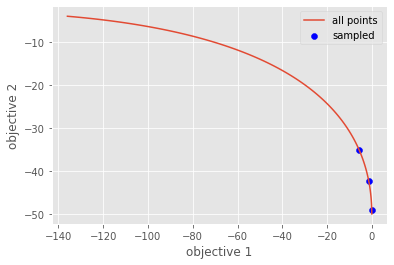

In [52]:
plt.plot(points[:,0], points[:,1], label='all points')
plt.scatter(points[indices,0], points[indices,1], label='sampled', c='b')
plt.legend()
plt.xlabel('objective 1')
plt.ylabel('objective 2')

In [53]:
palinstance.update_train_set(indices, points[indices])

Since we already have all the "measurements", we can use the `exhaust_loop` function to loop until there is no unclassified point left.

In [54]:
exhaust_loop(palinstance, points)

 /Users/kevinmaikjablonka/opt/miniconda3/envs/PyPal/lib/python3.7/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Optimization restart 1/20, f = 8.326987260864847
Optimization restart 2/20, f = -1.02623424747315
Optimization restart 3/20, f = -1.0262342474744823
Optimization restart 4/20, f = -1.0262342475075323
Optimization restart 5/20, f = -1.0262342473584933
Optimization restart 6/20, f = -1.0262342474958253
Optimization restart 7/20, f = -1.026234247015159
Optimization restart 8/20, f = -1.026234247508178
Optimization restart 9/20, f = -1.0257316317915883
Optimization restart 10/20, f = -1.0262342474016934
Optimization restart 11/20, f = -1.0257346240257847
Optimization restart 12/20, f = -1.0257316909213214
Optimization restart 13/20, f = -1.026234247500275
Optimization restart 14/20, f = -1.025733283634306
Optimization restart 15/20, f = -1.0257316652187134
Optimization restart 16/20, f = -1.026234245494635
Optimization restart 17/20, f = -1.0262342474888522
Optimization restart 18/20, f = -1.0262342474547257
Optimization restart 19/20, f = -1.0262342474997812
Optimization restart 20/20, f 

 /Users/kevinmaikjablonka/opt/miniconda3/envs/PyPal/lib/python3.7/site-packages/GPy/kern/src/stationary.py:137: RuntimeWarning:overflow encountered in square
 /Users/kevinmaikjablonka/opt/miniconda3/envs/PyPal/lib/python3.7/site-packages/GPy/kern/src/stationary.py:138: RuntimeWarning:invalid value encountered in add
 /Users/kevinmaikjablonka/opt/miniconda3/envs/PyPal/lib/python3.7/site-packages/GPy/kern/src/stationary.py:565: RuntimeWarning:invalid value encountered in multiply
 /Users/kevinmaikjablonka/opt/miniconda3/envs/PyPal/lib/python3.7/site-packages/GPy/kern/src/stationary.py:568: RuntimeWarning:invalid value encountered in subtract
 /Users/kevinmaikjablonka/opt/miniconda3/envs/PyPal/lib/python3.7/site-packages/GPy/kern/src/stationary.py:166: RuntimeWarning:overflow encountered in true_divide


Optimization restart 10/20, f = -97.6882870450901
Optimization restart 11/20, f = -99.69659113184433
Optimization restart 12/20, f = -100.05511526993774
Optimization restart 13/20, f = -99.9839272502137
Optimization restart 14/20, f = -99.48012900558793
Optimization restart 15/20, f = -99.69685710720422
Optimization restart 16/20, f = -99.73243411767037
Optimization restart 17/20, f = -99.84715915380454
Optimization restart 18/20, f = -99.78926507221968
Optimization restart 19/20, f = -99.82117389620788
Optimization restart 20/20, f = -100.816845172461
Optimization restart 1/20, f = -231.2283816147909


 /Users/kevinmaikjablonka/Dropbox (LSMO)/Documents/open_source/PythonPAL/pyepal/models/gpr.py:112: RuntimeWarning:invalid value encountered in sqrt


Optimization restart 2/20, f = -226.6518919085958
Optimization restart 3/20, f = -228.17723699059627
Optimization restart 4/20, f = -231.94829972143586
Optimization restart 5/20, f = -228.34513359049816
Optimization restart 6/20, f = -226.52250888941083
Optimization restart 7/20, f = -228.11166620352455
Optimization restart 8/20, f = -226.8766372469363


 /Users/kevinmaikjablonka/opt/miniconda3/envs/PyPal/lib/python3.7/site-packages/GPy/kern/src/stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Optimization restart 9/20, f = -227.6750037273378
Optimization restart 10/20, f = -228.00431116480547
Optimization restart 11/20, f = -228.03001106058537
Optimization restart 12/20, f = -228.35291458227084
Optimization restart 13/20, f = -227.2323206828723
Optimization restart 14/20, f = -229.6991836036768
Optimization restart 15/20, f = -230.4835114368593
Optimization restart 16/20, f = -229.6352462105531
Optimization restart 17/20, f = -227.49103863198607
Optimization restart 18/20, f = -230.90015127473947
Optimization restart 19/20, f = -228.8380757554988
Optimization restart 20/20, f = -230.47914003962643
Done. No unclassified point left


We should see that there is no unclassified point left

In [56]:
palinstance.number_unclassified_points

0

Since we will get a sparse approximation (ε and β scaling) to the Pareto front, there might be some points missing ...

In [57]:
palinstance.number_pareto_optimal_points

97

Text(0, 0.5, 'objective 2')

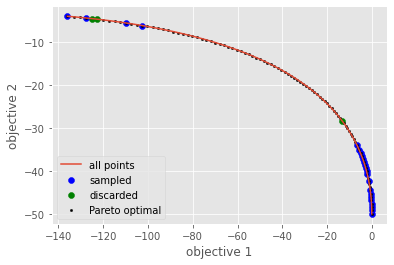

In [58]:
plt.plot(points[:,0], points[:,1], label='all points')
plt.scatter(points[palinstance.sampled_indices,0], 
            points[palinstance.sampled_indices,1], label='sampled', c='b')
plt.scatter(points[palinstance.discarded_indices,0], 
            points[palinstance.discarded_indices,1], label='discarded', c='g')

plt.scatter(points[palinstance.pareto_optimal_indices,0], 
            points[palinstance.pareto_optimal_indices,1], label='Pareto optimal', c='k', s=5)


plt.legend()
plt.xlabel('objective 1')
plt.ylabel('objective 2')

In [59]:
palinstance.number_sampled_points

23

Let's see how it works when we chose other initial points, note that we also choose a smaller epsilon.

In [73]:
model2 = build_coregionalized_model(x, points)
palinstance2 = PALCoregionalized(x, [model2], 2, beta_scale=1/3, epsilon=[0.05, 0.05])

In [74]:
indices2 = np.array([5, 20, 30, 50, 60,  70, 80, 95])

Text(0, 0.5, 'objective 2')

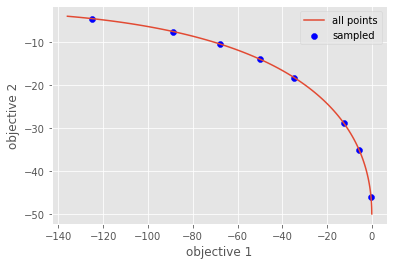

In [75]:
plt.plot(points[:,0], points[:,1], label='all points')
plt.scatter(points[indices2,0], points[indices2,1], label='sampled', c='b')
plt.legend()
plt.xlabel('objective 1')
plt.ylabel('objective 2')

In [76]:
palinstance2.update_train_set(indices2, points[indices2])

In [77]:
exhaust_loop(palinstance2, points)

Optimization restart 1/20, f = -42.998271288019176
Optimization restart 2/20, f = -44.049019962005694


 /Users/kevinmaikjablonka/opt/miniconda3/envs/PyPal/lib/python3.7/site-packages/GPy/kern/src/stationary.py:166: RuntimeWarning:overflow encountered in true_divide
 /Users/kevinmaikjablonka/opt/miniconda3/envs/PyPal/lib/python3.7/site-packages/GPy/kern/src/stationary.py:137: RuntimeWarning:overflow encountered in square
 /Users/kevinmaikjablonka/opt/miniconda3/envs/PyPal/lib/python3.7/site-packages/GPy/kern/src/stationary.py:138: RuntimeWarning:invalid value encountered in add


Optimization restart 3/20, f = -41.82894858174355
Optimization restart 4/20, f = -44.33679173287333
Optimization restart 5/20, f = -43.49379048617923
Optimization restart 6/20, f = -42.95644324432016
Optimization restart 7/20, f = -43.72076450005314
Optimization restart 8/20, f = -43.45512566691034
Optimization restart 9/20, f = -43.503670659111826
Optimization restart 10/20, f = -44.56379936870177
Optimization restart 11/20, f = -43.89514129662813
Optimization restart 12/20, f = -44.22840311880524
Optimization restart 13/20, f = -43.91450333794982
Optimization restart 14/20, f = -44.03536528190846
Optimization restart 15/20, f = -44.21368452503899
Optimization restart 16/20, f = -44.19036393649103
Optimization restart 17/20, f = -44.03319000361538
Optimization restart 18/20, f = -43.91967613081969
Optimization restart 19/20, f = -43.361218585609386
Optimization restart 20/20, f = -11.763762823219235
Optimization restart 1/20, f = -58.50465233094705


 /Users/kevinmaikjablonka/Dropbox (LSMO)/Documents/open_source/PythonPAL/pyepal/models/gpr.py:112: RuntimeWarning:invalid value encountered in sqrt
 /Users/kevinmaikjablonka/opt/miniconda3/envs/PyPal/lib/python3.7/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Optimization restart 2/20, f = -57.13238887964742
Optimization restart 3/20, f = -56.69840991031516
Optimization restart 4/20, f = -57.48823557585543
Optimization restart 5/20, f = -57.622169556695454
Optimization restart 6/20, f = -57.66094203804886
Optimization restart 7/20, f = -57.74248648680441


 /Users/kevinmaikjablonka/opt/miniconda3/envs/PyPal/lib/python3.7/site-packages/GPy/kern/src/stationary.py:565: RuntimeWarning:invalid value encountered in multiply
 /Users/kevinmaikjablonka/opt/miniconda3/envs/PyPal/lib/python3.7/site-packages/GPy/kern/src/stationary.py:568: RuntimeWarning:invalid value encountered in subtract


Optimization restart 8/20, f = -55.29445254078247
Optimization restart 9/20, f = -57.086874724985435
Optimization restart 10/20, f = -57.574991773437446
Optimization restart 11/20, f = -56.28207910356126
Optimization restart 12/20, f = -57.53378312707298
Optimization restart 13/20, f = -57.27643505767783


 /Users/kevinmaikjablonka/opt/miniconda3/envs/PyPal/lib/python3.7/site-packages/GPy/kern/src/stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Optimization restart 14/20, f = -45.845408071175925
Optimization restart 15/20, f = -56.183018330316216
Optimization restart 16/20, f = -57.50371241910422
Optimization restart 17/20, f = -57.16648510130575
Optimization restart 18/20, f = -57.65874810729872
Optimization restart 19/20, f = -55.43484094552822
Optimization restart 20/20, f = -54.83791273740907
Done. No unclassified point left


In [78]:
palinstance2.number_pareto_optimal_points

100

Text(0, 0.5, 'objective 2')

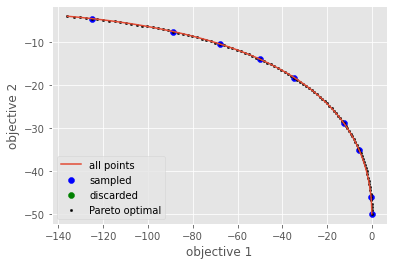

In [79]:
plt.plot(points[:,0], points[:,1], label='all points')
plt.scatter(points[palinstance2.sampled_indices,0], 
            points[palinstance2.sampled_indices,1], label='sampled', c='b')
plt.scatter(points[palinstance2.discarded_indices,0], 
            points[palinstance2.discarded_indices,1], label='discarded', c='g')

plt.scatter(points[palinstance2.pareto_optimal_indices,0], 
            points[palinstance2.pareto_optimal_indices,1], label='Pareto optimal', c='k', s=5)


plt.legend()
plt.xlabel('objective 1')
plt.ylabel('objective 2')